In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [99]:
data = pd.read_excel('medicos_prediction.xlsx')
data['vdt'] = pd.to_datetime(data['vdt'], format='%Y-%m-%d')
data.head(45)

,vdt,order_count,line_items,qty,amt
0,2022-11-01,529.0,2589.0,14671.0,887180.44
1,2022-11-02,542.0,2720.0,14624.0,1039341.39
2,2022-11-03,532.0,2642.0,14048.0,1070562.35
3,2022-11-04,634.0,3186.0,16942.0,1315048.63
4,2022-11-05,551.0,2977.0,15411.0,1038939.34
5,2022-11-06,234.0,1954.0,10757.0,953850.52
6,2022-11-07,NaN,NaN,NaN,NaN
7,2022-11-08,557.0,2876.0,14670.0,889669.14
8,2022-11-09,458.0,2440.0,14243.0,986874.60
9,2022-11-10,472.0,2337.0,13135.0,907151.19


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   vdt          92 non-null     datetime64[ns]
 1   order_count  86 non-null     float64       
 2   line_items   86 non-null     float64       
 3   qty          86 non-null     float64       
 4   amt          86 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.7 KB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


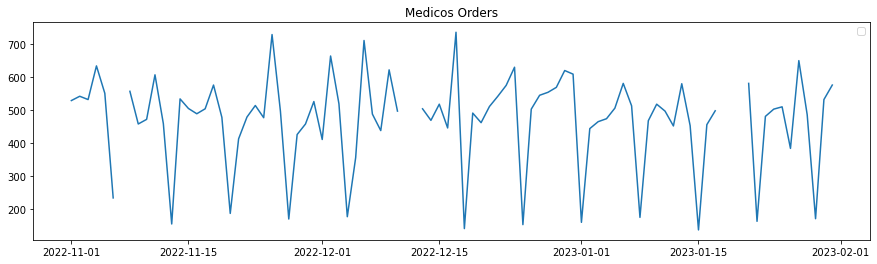

In [101]:
plt.figure(figsize=(15, 4))
plt.plot(data.vdt, data.order_count)
plt.title('Medicos Orders')
plt.legend(loc='best')
plt.show(block=False)

In [102]:
# plt.figure(figsize=(15, 4))
# sns.lineplot(x="vdt", y="order_count",data=data)

#### Missing Value Treatment

###### Mean Imputation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


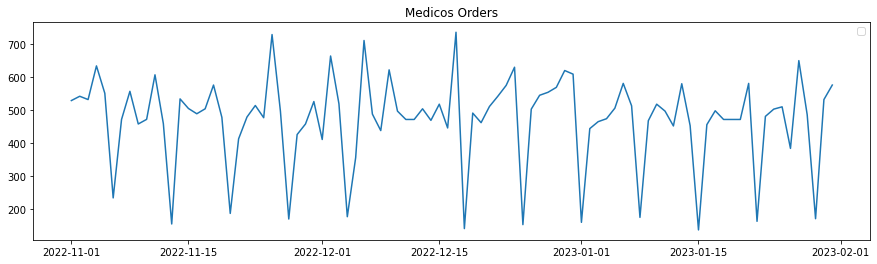

In [103]:
data = data.assign(Order_Mean_Imputation=data.order_count.fillna(data.order_count.mean()))
plt.figure(figsize=(15, 4))
plt.plot(data.vdt, data.Order_Mean_Imputation)
plt.title('Medicos Orders')
plt.legend(loc='best')
plt.show(block=False)

###### Linear Interpolation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


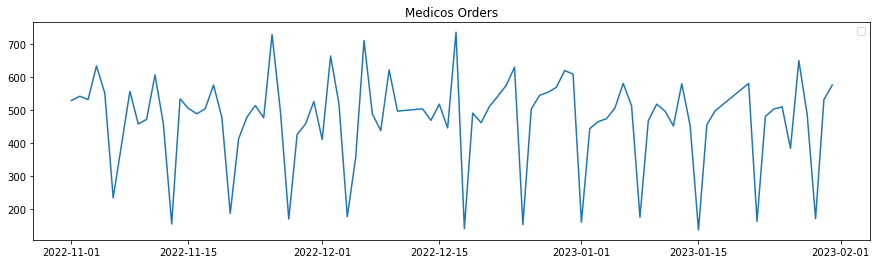

In [104]:
data = data.assign(Order_Linear_Interpolation=data.order_count.interpolate(method='linear'))
plt.figure(figsize=(15, 4))
plt.plot(data.vdt, data.Order_Linear_Interpolation)
plt.title('Medicos Orders')
plt.legend(loc='best')
plt.show(block=False)

In [105]:
data.head(45)

,vdt,order_count,line_items,qty,amt,Order_Mean_Imputation,Order_Linear_Interpolation
0,2022-11-01,529.0,2589.0,14671.0,887180.44,529.000000,529.000000
1,2022-11-02,542.0,2720.0,14624.0,1039341.39,542.000000,542.000000
2,2022-11-03,532.0,2642.0,14048.0,1070562.35,532.000000,532.000000
3,2022-11-04,634.0,3186.0,16942.0,1315048.63,634.000000,634.000000
4,2022-11-05,551.0,2977.0,15411.0,1038939.34,551.000000,551.000000
5,2022-11-06,234.0,1954.0,10757.0,953850.52,234.000000,234.000000
6,2022-11-07,NaN,NaN,NaN,NaN,471.709302,395.500000
7,2022-11-08,557.0,2876.0,14670.0,889669.14,557.000000,557.000000
8,2022-11-09,458.0,2440.0,14243.0,986874.60,458.000000,458.000000
9,2022-11-10,472.0,2337.0,13135.0,907151.19,472.000000,472.000000


In [106]:
data['order_count'] = data['Order_Linear_Interpolation']

#### Outlier Detection

<AxesSubplot:xlabel='order_count'>

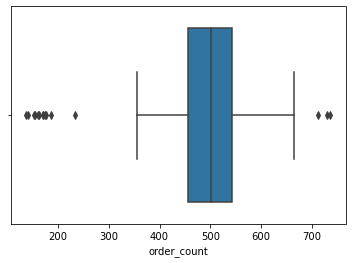

In [107]:
sns.boxplot(x=data['order_count'])

In [108]:
# iqr = data['order_count'].quantile(0.75) - data['order_count'].quantile(0.25)
# lqr = data['order_count'].quantile(0.25) - 1.5 * iqr
# uqr = data['order_count'].quantile(0.25) + 1.5 * iqr
# data = data[(data['order_count'] >= lqr) & (data['order_count'] >= uqr)]

<AxesSubplot:>

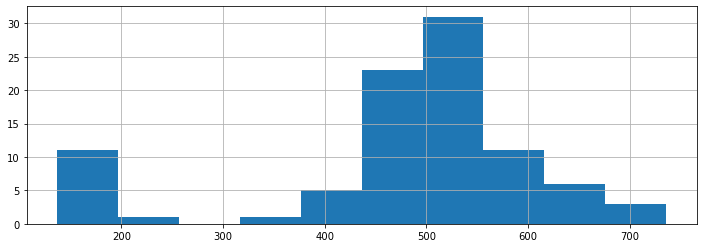

In [111]:
data.order_count.hist(figsize=(12,4))

#### Additive Seasonal Decomposition

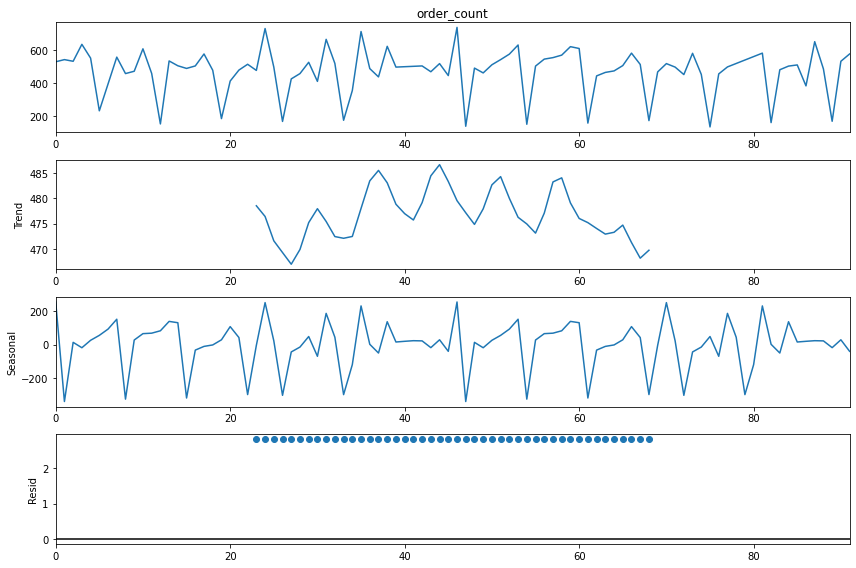

In [157]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposiotion = sm.tsa.seasonal_decompose(x=data.order_count,period=46, model='additive')
fig = decomposiotion.plot()
plt.show()

In [116]:
data

,vdt,order_count,line_items,qty,amt,Order_Mean_Imputation,Order_Linear_Interpolation
0,2022-11-01,529.0,2589.0,14671.0,887180.44,529.0,529.0
1,2022-11-02,542.0,2720.0,14624.0,1039341.39,542.0,542.0
2,2022-11-03,532.0,2642.0,14048.0,1070562.35,532.0,532.0
3,2022-11-04,634.0,3186.0,16942.0,1315048.63,634.0,634.0
4,2022-11-05,551.0,2977.0,15411.0,1038939.34,551.0,551.0
...,...,...,...,...,...,...,...
87,2023-01-27,650.0,2964.0,24290.0,1296283.99,650.0,650.0
88,2023-01-28,486.0,2426.0,13769.0,888056.53,486.0,486.0
89,2023-01-29,171.0,1491.0,7116.0,633600.31,171.0,171.0
90,2023-01-30,532.0,2945.0,15886.0,929452.33,532.0,532.0
